In [15]:
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from ast import literal_eval

# NATO Analysis & Evaluation

In [11]:
df_nato = pd.read_csv("data/putin_complete_with_llm_nato.csv",
    converters={'wordlist': literal_eval})

# add length of wordlist as a column
df_nato['length'] = df_nato['wordlist'].apply(lambda x: len(x))

In [10]:
print(df_nato.head(1).T)
print(f"Len: {len(df_nato)}")
# Size of data by annotation type
print(f"Nato topic: {df_nato[df_nato["llm_nato_topic"] == "YES"].shape[0]}")
print(f"Nato keyword: {df_nato[df_nato["llm_nato"] == "YES"].shape[0]}")
print(f"Nato regex: {df_nato[df_nato["regex_nato"] == "YES"].shape[0]} ")

                                                                       0
date                                                 1999-12-31 00:01:00
persons                                                               []
transcript_unfiltered  Vladimir Putin: Dear friends, On New Year’s Ev...
kremlin_id                                                       22280.0
place                                                The Kremlin, Moscow
title                  New Year Address by Acting President Vladimir ...
teaser                                                               NaN
tags                                                                  []
transcript_filtered    Dear friends, On New Year’s Eve, my family and...
wordlist               [dear, friend, ,, on, new, year, ’s, eve, ,, m...
year                                                                1999
llm_nato                                                              NO
llm_nato_topic                                     

In [ ]:
display(df_nato['length'].describe())
display(df_nato.loc[df_nato['llm_nato'] == "YES", 'length'].describe())
display(df_nato.loc[df_nato['llm_nato_topic'] == "YES", 'length'].describe())
display(df_nato.loc[df_nato['regex_nato'] == "YES", 'length'].describe())

count     9335.000000
mean      1099.206856
std       1928.763490
min          7.000000
25%        286.000000
50%        588.000000
75%       1204.000000
max      30758.000000
Name: length, dtype: float64

count     2213.000000
mean      2619.944419
std       3153.135148
min         73.000000
25%       1091.000000
50%       1556.000000
75%       2918.000000
max      28055.000000
Name: length, dtype: float64

count     2275.000000
mean      2742.096264
std       3315.806901
min         73.000000
25%       1166.500000
50%       1697.000000
75%       2938.000000
max      30758.000000
Name: length, dtype: float64

count      446.000000
mean      4316.751121
std       5253.498641
min         73.000000
25%       1198.500000
50%       2412.500000
75%       4978.250000
max      30758.000000
Name: length, dtype: float64

In [28]:
# Number of speeches where length >16k
len(df_nato[df_nato['length']>16000])

36

In [5]:
df = df_nato[df_nato['length'] <= 3000]
# Size of data by annotation type
print(f"Nato topic: {df[df["llm_nato_topic"] == "YES"].shape[0]}")
print(f"Nato keyword: {df[df["llm_nato"] == "YES"].shape[0]}")
print(f"Nato regex: {df[df["regex_nato"] == "YES"].shape[0]} ")

Nato topic: 1726
Nato keyword: 1686
Nato regex: 257 


In [ ]:
random_subset = df.sample(10, random_state=42)
random_subset['subset'] = 'Random Speech'

regex_yes_llm_no = df[
    (df['regex_nato'] == 'YES') &
    (df['llm_nato'] == 'NO')
].sample(10, random_state=42)

regex_yes_llm_no['subset'] = 'Regex-Yes / LLM-No'

regex_no_llm_yes = df[
    (df['regex_nato'] == 'NO') &
    (df['llm_nato'] == 'YES')
].sample(10, random_state=42)

regex_no_llm_yes['subset'] = 'Regex-No / LLM-Yes'

both_yes = df[
    (df['regex_nato'] == 'YES') &
    (df['llm_nato'] == 'YES')
].sample(10, random_state=42)

both_yes['subset'] = 'Both Correct (YES)'

annotation_set = pd.concat([
    random_subset,
    regex_yes_llm_no,
    regex_no_llm_yes,
    both_yes
]).sample(frac=1, random_state=42)  # shuffle

annotation_set = annotation_set[['transcript_filtered', 'wordlist', 'year',
       'llm_nato', 'llm_nato_topic', 'regex_nato', 'subset', 'length']]
display(annotation_set.value_counts('subset'))
display(annotation_set)

subset
Both Correct (YES)    10
Random Speech         10
Regex-No / LLM-Yes    10
Regex-Yes / LLM-No    10
Name: count, dtype: int64

,transcript_filtered,wordlist,year,llm_nato,llm_nato_topic,regex_nato,subset,length
5427,"Good afternoon, please, go ahead. Regarding th...","[good, afternoon, ,, please, ,, go, ahead, ., ...",2014,NO,YES,YES,Regex-Yes / LLM-No,2120
2498,The latest summit of the Collective Security T...,"[the, late, summit, of, the, collective, secur...",2008,NO,YES,YES,Regex-Yes / LLM-No,1779
541,It is a planned visit. We agreed with Chairman...,"[it, be, a, planned, visit, ., we, agree, with...",2002,NO,YES,YES,Regex-Yes / LLM-No,2895
6988,"Good afternoon, colleagues, Today we have gath...","[good, afternoon, ,, colleague, ,, today, we, ...",2017,YES,YES,NO,Regex-No / LLM-Yes,2266
8257,"Mr President, friends, I would like to warmly ...","[mr, president, ,, friend, ,, i, would, like, ...",2020,NO,NO,NO,Random Speech,144
4175,"Mr Rogozin, I see that you have already got to...","[mr, rogozin, ,, i, see, that, you, have, alre...",2012,NO,NO,YES,Regex-Yes / LLM-No,643
8995,"Good afternoon, colleagues. We are meeting tod...","[good, afternoon, ,, colleague, ., we, be, mee...",2022,YES,YES,YES,Both Correct (YES),2769
4995,"Good afternoon, colleagues, Our meeting is dev...","[good, afternoon, ,, colleague, ,, our, meetin...",2013,YES,YES,NO,Regex-No / LLM-Yes,2230
8993,"Mr President, colleagues, ladies and gentlemen...","[mr, president, ,, colleague, ,, lady, and, ge...",2022,YES,YES,YES,Both Correct (YES),2141
6870,"Mr Parfenchikov, how long have you been workin...","[mr, parfenchikov, ,, how, long, have, you, be...",2017,NO,NO,NO,Random Speech,590


year
2000    2
2001    4
2002    2
2003    1
2004    1
2006    1
2008    2
2009    3
2010    3
2011    1
2012    2
2013    3
2014    2
2015    1
2017    4
2018    1
2019    1
2020    1
2021    2
2022    3
dtype: int64

In [ ]:
# annotation_set.to_csv("data/annotation_nato.csv", index=True)

In [50]:
df_nato.loc[8988]['transcript_filtered']

'Mr President, colleagues, I would like to begin by thanking the President of the Federative Republic of Brazil, Mr Jair Bolsonaro for accepting my invitation to come to Russia on an official visit. This is the President’s first visit to Russia. Let me note that relations between Russia and Brazil have traditionally been based on friendship and understanding. The strategic partnership between the two countries includes many diverse areas. Together, we want to develop political, economic and cultural ties, and cooperate closely on the global stage, at the UN, in BRICS, and in the G20, among others. And today we have had quite substantive and constructive talks. Following the talks, we adopted a joint statement that sets the guidelines for the further development of Russian-Brazilian cooperation. Our countries are definitely interested in progressively expanding economic interaction. Brazil is one of Russia’s leading trade partners in Latin America and the Caribbean, accounting for one t

In [16]:
df_eval = pd.read_csv("data/nato_evaluation.csv", encoding='cp1252', sep=';').set_index('Index')

In [17]:
y_llm = df_eval['llm_nato'].map({'YES': 1, 'NO': 0}).values
y_llm_topic = df_eval['llm_nato_topic'].map({'YES': 1, 'NO': 0}).values
y_regex = df_eval['regex_nato'].map({'YES': 1, 'NO': 0}).values
y_true = df_eval['human_label'].map({'YES': 1, 'NO': 0}).values

In [18]:
from sklearn.metrics import classification_report
print("LLM NATO Keyword Classification Report:")
print(classification_report(y_true, y_llm, target_names=['NO', 'YES']))
print("LLM NATO Topic Classification Report:")
print(classification_report(y_true, y_llm_topic, target_names=['NO', 'YES']))
print("Regex NATO Classification Report:")
print(classification_report(y_true, y_regex, target_names=['NO', 'YES']))

LLM NATO Keyword Classification Report:
              precision    recall  f1-score   support

          NO       0.47      0.47      0.47        19
         YES       0.52      0.52      0.52        21

    accuracy                           0.50        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.50      0.50      0.50        40

LLM NATO Topic Classification Report:
              precision    recall  f1-score   support

          NO       0.85      0.58      0.69        19
         YES       0.70      0.90      0.79        21

    accuracy                           0.75        40
   macro avg       0.77      0.74      0.74        40
weighted avg       0.77      0.75      0.74        40

Regex NATO Classification Report:
              precision    recall  f1-score   support

          NO       0.95      1.00      0.97        19
         YES       1.00      0.95      0.98        21

    accuracy                           0.97        40
   macro avg    

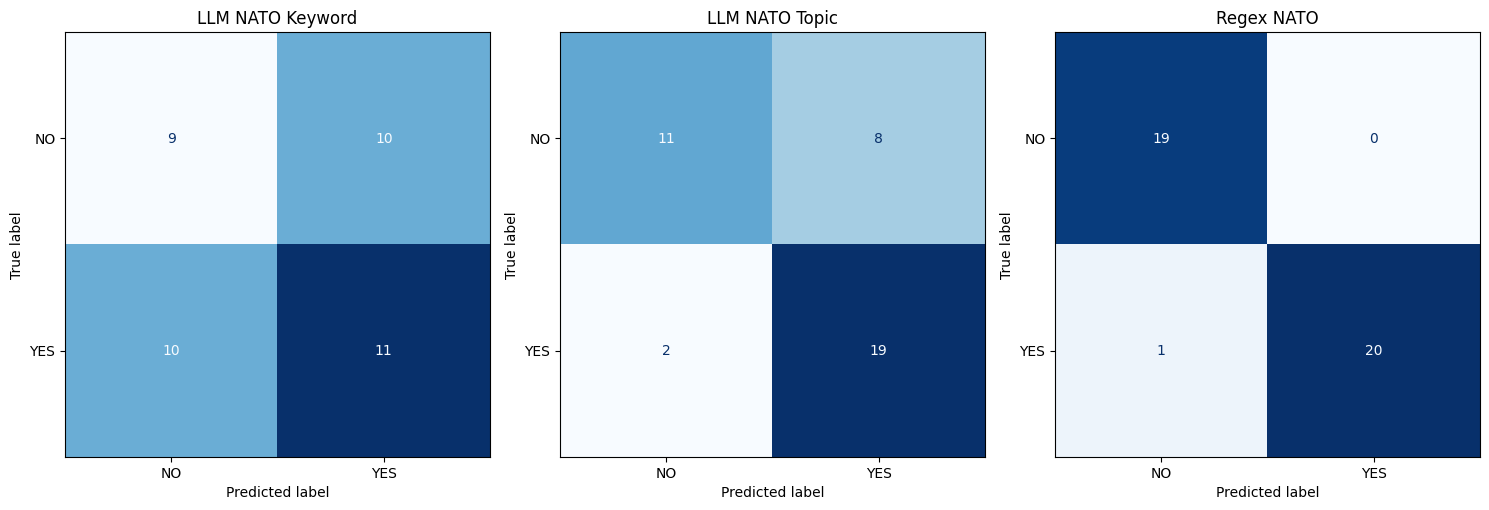

LLM NATO Keyword - False Positives: 10, False Negatives: 10
LLM NATO Topic - False Positives: 8, False Negatives: 2
Regex NATO - False Positives: 0, False Negatives: 1


In [23]:
# Confusion matrix for all three methods
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_true, y_llm, display_labels=['NO', 'YES'], ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('LLM NATO Keyword')
ConfusionMatrixDisplay.from_predictions(y_true, y_llm_topic, display_labels=['NO', 'YES'], ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('LLM NATO Topic')
ConfusionMatrixDisplay.from_predictions(y_true, y_regex, display_labels=['NO', 'YES'], ax=axes[2], cmap='Blues', colorbar=False)
axes[2].set_title('Regex NATO')
plt.tight_layout()
plt.show()

# False Positive and False Negative Analysis
fp_llm = df_eval[(y_true == 0) & (y_llm == 1)]
fn_llm = df_eval[(y_true == 1) & (y_llm == 0)]
fp_llm_topic = df_eval[(y_true == 0) & (y_llm_topic == 1)]
fn_llm_topic = df_eval[(y_true == 1) & (y_llm_topic == 0)]
fp_regex = df_eval[(y_true == 0) & (y_regex == 1)]
fn_regex = df_eval[(y_true == 1) & (y_regex == 0)]
print(f"LLM NATO Keyword - False Positives: {len(fp_llm)}, False Negatives: {len(fn_llm)}")
print(f"LLM NATO Topic - False Positives: {len(fp_llm_topic)}, False Negatives: {len(fn_llm_topic)}")
print(f"Regex NATO - False Positives: {len(fp_regex)}, False Negatives: {len(fn_regex)}")


In [12]:
# Count the size of regex speeches length
df_nato[df_nato['regex_nato'] == 'YES']['length'].describe()

count      446.000000
mean      4316.751121
std       5253.498641
min         73.000000
25%       1198.500000
50%       2412.500000
75%       4978.250000
max      30758.000000
Name: length, dtype: float64

<Axes: >

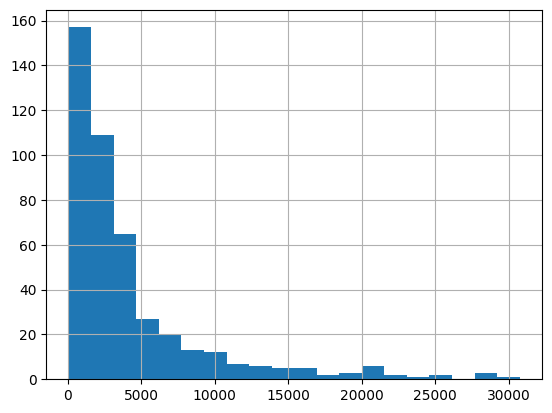

In [14]:
df_nato[df_nato['regex_nato'] == 'YES']['length'].hist(bins=20)

# Democracy Analysis & Evaluation

In [ ]:
df_demo = pd.read_csv("data/putin_talks_prepared_with_llm.csv", converters={'wordlist': literal_eval})
df_demo.iloc[0].T

date                                                   2012-05-07 12:20:00
persons                                                                 []
transcript_unfiltered    The ceremony opened with the Russian State Fla...
kremlin_id                                                         15224.0
place                                                  The Kremlin, Moscow
title                    Vladimir Putin inaugurated as President of Russia
teaser                   The inauguration ceremony took place in the Gr...
tags                                                                    []
transcript_filtered      Citizens of Russia, friends, The inauguration ...
wordlist                 [citizen, of, russia, ,, friend, ,, the, inaug...
grouped_tages                                                           []
year                                                                  2012
llm_democracy                                                          YES
llm_democracy_topic      

In [27]:
print(f"Len: {len(df_demo)}")
# Size of data by annotation type
print(f"Democracy topic: {df_demo[df_demo["llm_democracy_topic"] == "YES"].shape[0]}")
print(f"Democracy keyword: {df_demo[df_demo["llm_democracy"] == "YES"].shape[0]}")
print(f"Democracy regex: {df_demo[df_demo["regex_democracy"] == "YES"].shape[0]} ")

Len: 5079
Democracy topic: 754
Democracy keyword: 631
Democracy regex: 120 
